In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import matplotlib.lines as mlines
import seaborn as sns

In [3]:
multi_r_models_djf = pd.read_csv('outputs/multi_r_models_djf.csv')
multi_r_models_mam = pd.read_csv('outputs/multi_r_models_mam.csv')
multi_r_models_jja = pd.read_csv('outputs/multi_r_models_jja.csv')
multi_r_models_son = pd.read_csv('outputs/multi_r_models_son.csv')

In [4]:
df_diff_djf_ens_first = pd.read_csv('outputs/1st_realisation_djf.csv', index_col=0)
df_diff_son_ens_first = pd.read_csv('outputs/1st_realisation_son.csv', index_col=0)

In [5]:
multi_r_models_djf.head()

,ACCESS-ESM1-5,CESM2-WACCM,CNRM-CM6-1,CNRM-ESM2-1,CanESM5,HadGEM3-GC31-LL,HadGEM3-GC31-MM,IPSL-CM6A-LR,MIROC-ES2L,UKESM1-0-LL
0,-0.602643,0.869725,1.995679,0.064595,2.634396,-0.020214,1.341278,0.265404,1.470211,-0.037256
1,-0.536366,0.914458,1.922337,0.092876,2.786439,-0.004519,1.336470,0.290777,1.354102,-0.037488
2,-0.667853,0.513141,1.389691,0.116126,2.759530,0.009259,1.641956,0.191074,1.786480,-0.111111
3,-0.633901,0.684482,1.747739,-0.272675,2.728611,-0.191545,0.990926,0.151297,1.307204,-0.377858
4,-0.708718,0.193365,1.245178,-0.230701,1.874469,-0.404885,0.829989,0.555034,1.197538,-0.320943


In [6]:
num_metrics = 6
model_counts = dict(multi_r_models_djf.count() / num_metrics)

In [7]:
model_counts

{'ACCESS-ESM1-5': 2.0,
 'CESM2-WACCM': 3.0,
 'CNRM-CM6-1': 6.0,
 'CNRM-ESM2-1': 2.0,
 'CanESM5': 19.0,
 'HadGEM3-GC31-LL': 4.0,
 'HadGEM3-GC31-MM': 4.0,
 'IPSL-CM6A-LR': 3.0,
 'MIROC-ES2L': 7.0,
 'UKESM1-0-LL': 6.0}

In [8]:
marker_list = ['o', 'X', 's', 'P',\
               'D',mmarkers.MarkerStyle((4, 1, 0)),\
               '^',mmarkers.MarkerStyle((4, 1, 45)), 'v', mmarkers.MarkerStyle((8, 1, 0))]

In [9]:
realisation_numbers = np.array(sorted(list(np.arange(1, 20))*num_metrics))
realisation_numbers

array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19])

In [10]:
legend_elements = [
    mlines.Line2D([0], [0], marker=marker_list[ind], color=f'C{ind}', label=multi_r_models_djf.columns[ind] + f" ({int(model_counts[multi_r_models_djf.columns[ind]])})",\
                  markersize=6, linestyle='None', alpha=.8) 
    for ind in range(len(multi_r_models_djf.columns))
]

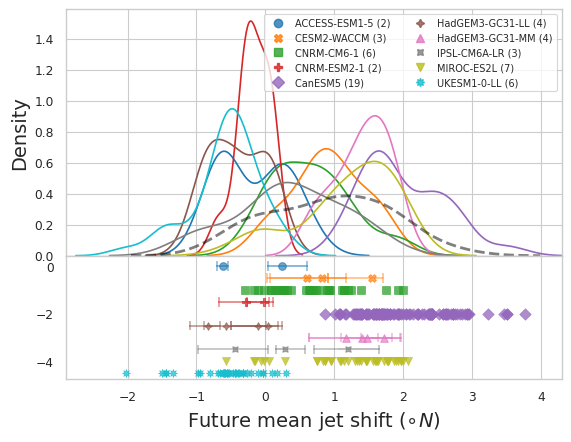

In [11]:
sns.set_context('paper')
sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 1,  sharey=False, sharex=True, height_ratios=[0.7, 0.35]) 
plt.subplots_adjust(hspace=0)

for column in multi_r_models_djf.columns:
    sns.kdeplot(multi_r_models_djf[column], fill=False, ax=axes[0])

y_offset = 0.0
# for ind, column in enumerate(multi_r_models_djf.columns):
for ind, (model, count) in enumerate(model_counts.items()):
    if count < 5:
        for num in range(1, 5):
            model_data = multi_r_models_djf.loc[realisation_numbers == num][model].dropna()
            if len(model_data) == 0:
                continue
            axes[1].scatter(np.median(model_data.values), y=-y_offset, marker=marker_list[ind], color=f'C{ind}', label='Point Plot', s=30, alpha=.65)
            axes[1].plot(model_data.values, np.zeros_like(model_data.values)-y_offset, color=f'C{ind}', linestyle='-', alpha=.5)
            cap_length = 0.2  # Adjust the length of the caps as needed
            axes[1].vlines(np.max(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
            axes[1].vlines(np.min(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
    else:
        sns.scatterplot(x=multi_r_models_djf[model], y=np.zeros_like(multi_r_models_djf[model])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, facecolor=f'C{ind}', edgecolor=f'C{ind}', label=f'{model}', ax=axes[1])
    y_offset += .5
sns.kdeplot(df_diff_djf_ens_first.mean(axis=1), ax=axes[0], color='k',
            linestyle='--', linewidth=2, fill=False, alpha=.5)
# axes[0].set_ylim(0.0, 1.8)
axes[1].grid(axis='y')
# axes[1].set_yticklabels(['']*18)
axes[1].set_xlabel("Future mean jet shift (${\circ N}$)", size=14)
axes[0].set_ylabel("Density", size=14)

for ax in axes:
    ax.set_xlim(-2.9, 4.3)
# axes[1].legend(ncols=2, bbox_to_anchor=(1., 3.2), fontsize=7)

# Create a legend
axes[1].legend(handles=legend_elements, ncols=2, bbox_to_anchor=(1., 3.), fontsize=7)

# fig.savefig(f'figures/figure_4_intramodel_djf.png', bbox_inches='tight', dpi=200)

/tmp/ipykernel_26126/1426968595.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(['']*18)


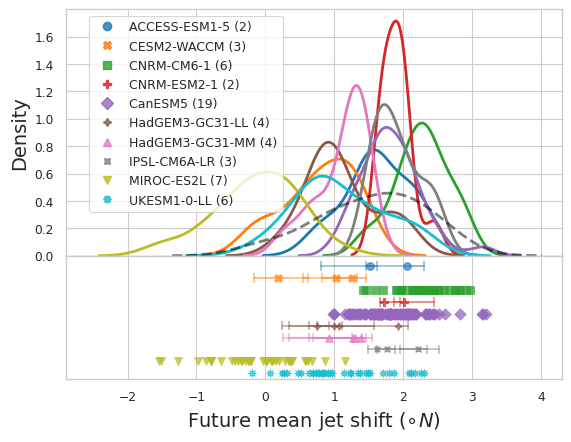

In [12]:
sns.set_context('paper')
sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 1,  sharey=False, sharex=True, height_ratios=[0.7, 0.35]) 
plt.subplots_adjust(hspace=0)

for column in multi_r_models_son.columns:
    sns.kdeplot(multi_r_models_son[column], linewidth=2, fill=False, ax=axes[0])

y_offset = 0.0
# for ind, column in enumerate(multi_r_models_djf.columns):
for ind, (model, count) in enumerate(model_counts.items()):
    if count < 5:
        for num in range(1, 5):
            model_data = multi_r_models_son.loc[realisation_numbers == num][model].dropna()
            if len(model_data) == 0:
                continue
            axes[1].scatter(np.median(model_data.values), y=-y_offset, marker=marker_list[ind], color=f'C{ind}', label='Point Plot', s=30, alpha=.65)
            axes[1].plot(model_data.values, np.zeros_like(model_data.values)-y_offset, color=f'C{ind}', linestyle='-', alpha=.5)
            cap_length = 0.2  # Adjust the length of the caps as needed
            axes[1].vlines(np.max(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
            axes[1].vlines(np.min(model_data.values), -y_offset - cap_length, -y_offset + cap_length, colors=f'C{ind}', alpha=.5)
    else:
        sns.scatterplot(x=multi_r_models_son[model], y=np.zeros_like(multi_r_models_son[model])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, facecolor=f'C{ind}', edgecolor=f'C{ind}', label=f'{model}', ax=axes[1])
    y_offset += .5
sns.kdeplot(df_diff_son_ens_first.mean(axis=1), ax=axes[0], color='k',
            linestyle='--', linewidth=2, fill=False, alpha=.5)
axes[1].grid(axis='y')
axes[1].set_yticklabels(['']*18)
axes[1].set_xlabel("Future mean jet shift (${\circ N}$)", size=14)
axes[0].set_ylabel("Density", size=14)
# axes[0].set_ylim(0, 2.5)
for ax in axes:
    ax.set_xlim(-2.9, 4.3)
# Create a legend
axes[1].legend(handles=legend_elements, ncols=1, bbox_to_anchor=(0.45, 3.), fontsize=9)

# fig.savefig(f'figures/figure_4_intramodel_son.png', bbox_inches='tight', dpi=200)

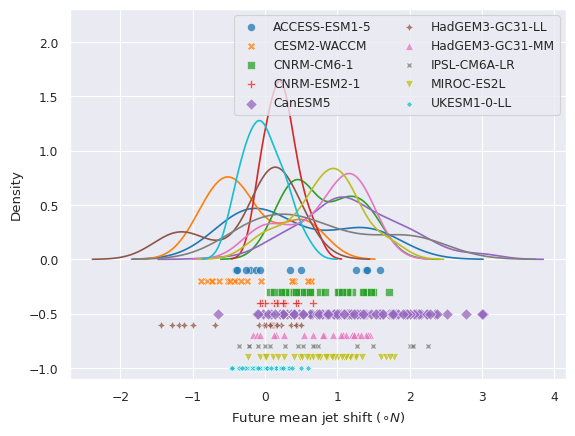

In [65]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig, ax = plt.subplots(1) 
for column in multi_r_models_mam.columns:
    sns.kdeplot(multi_r_models_mam[column], fill=False, ax=ax)

y_offset = 0.1
for ind, column in enumerate(multi_r_models_mam.columns):
    sns.scatterplot(x=multi_r_models_mam[column], y=np.zeros_like(multi_r_models_mam[column])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, label=f'{column}', ax=ax)
    y_offset += 0.1

ax.set_ylim(-1.1, 2.3)
ax.set_xlabel("Future mean jet shift (${\circ N}$)")
plt.legend(ncols=2)
# fig.savefig(f'figures/figure_4_intramodel_mam.png', bbox_inches='tight', dpi=200)

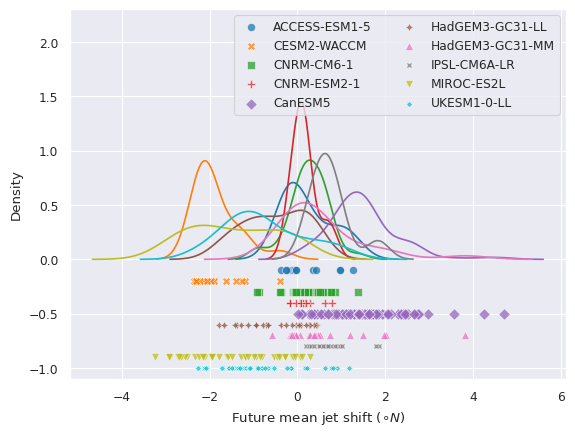

In [87]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig, ax = plt.subplots(1) 
for column in multi_r_models_jja.columns:
    sns.kdeplot(multi_r_models_jja[column], fill=False, ax=ax)

y_offset = 0.1
for ind, column in enumerate(multi_r_models_jja.columns):
    sns.scatterplot(x=multi_r_models_jja[column], y=np.zeros_like(multi_r_models_jja[column])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, label=f'{column}', ax=ax)
    y_offset += 0.1

ax.set_ylim(-1.1, 2.3)
ax.set_xlabel("Future mean jet shift (${\circ N}$)")
plt.legend(ncols=2)
# fig.savefig(f'figures/figure_4_intramodel_jja.png', bbox_inches='tight', dpi=200)

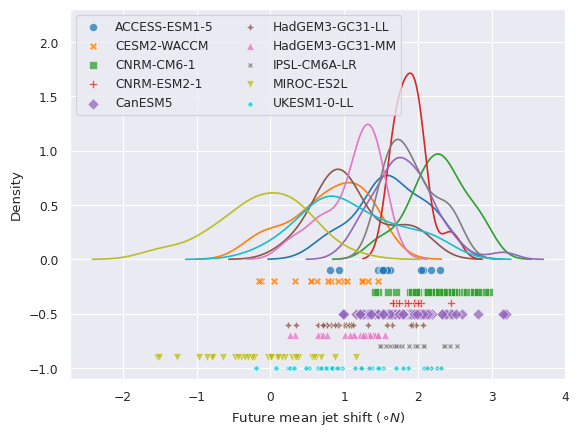

In [88]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig, ax = plt.subplots(1) 
for column in multi_r_models_son.columns:
    sns.kdeplot(multi_r_models_son[column], fill=False, ax=ax)

y_offset = 0.1
for ind, column in enumerate(multi_r_models_son.columns):
    sns.scatterplot(x=multi_r_models_son[column], y=np.zeros_like(multi_r_models_son[column])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, label=f'{column}', ax=ax)
    y_offset += 0.1

ax.set_ylim(-1.1, 2.3)
ax.set_xlabel("Future mean jet shift (${\circ N}$)")
plt.legend(ncols=2)
# fig.savefig(f'figures/figure_4_intramodel_son.png', bbox_inches='tight', dpi=200)